In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                  index=[1992,1993,1994,1995])

In [2]:
dfT =df.T
dfStats = dfT.describe()
dfStats
dfStatsT = dfStats.T
dfStatsT['yerr'] = 1.96 * dfStatsT['std'] / np.sqrt(dfStatsT['count'])
dfStats = dfStatsT.T
dfStats

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,34484.080607,39975.673587,37565.689950,47798.504333
std,150473.176164,88558.520583,120317.078777,54828.074297
min,-528303.381600,-287127.421315,-382709.382654,-138894.685422
25%,-67555.298773,-21665.471992,-45516.912051,11680.007981
50%,31756.198287,41001.778992,39197.241173,49103.396625
75%,135081.379021,99766.920131,121367.183244,84271.976610
max,622629.206119,358327.854561,423792.855746,262363.983464
yerr,4881.673477,2873.028882,3903.344818,1778.740656


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
%matplotlib notebook

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,2793.851077,105341.500709,-44415.807259,-49859.545652,328367.085875,242510.874946,47436.181512,75761.922925,148853.385142,220465.210458,...,138454.070217,122488.069943,162247.982356,-273907.868554,-138410.570396,27638.756441,-33120.047151,-40989.824866,94532.974507,6128.841097
1993,-44406.485331,180815.466879,-108866.427539,-114625.083717,196807.232582,47161.295355,136522.083654,58826.904901,23329.019613,-96417.638483,...,-37809.868064,93228.910228,108183.379950,146728.060346,-10083.899508,-31300.144215,95017.857057,164071.514663,14409.944591,33298.608969
1994,134288.798913,169097.538334,337957.368420,-76005.273164,90130.207911,8453.626320,-24562.317561,195665.400438,-53475.640770,44708.230667,...,145216.405451,67773.006363,95711.194465,174500.629277,-27821.888075,-57881.583140,26321.525617,-21424.067186,60164.652898,-74750.286614
1995,-44485.202120,-156.410517,-13425.878636,53540.999558,130408.559874,20445.656224,60336.077232,60688.099156,-12748.496722,57150.175074,...,-636.804950,49707.896672,52687.564135,13529.920850,67016.324752,41664.942829,119870.946944,56946.289297,67927.466106,32839.707999


<IPython.core.display.Javascript object>


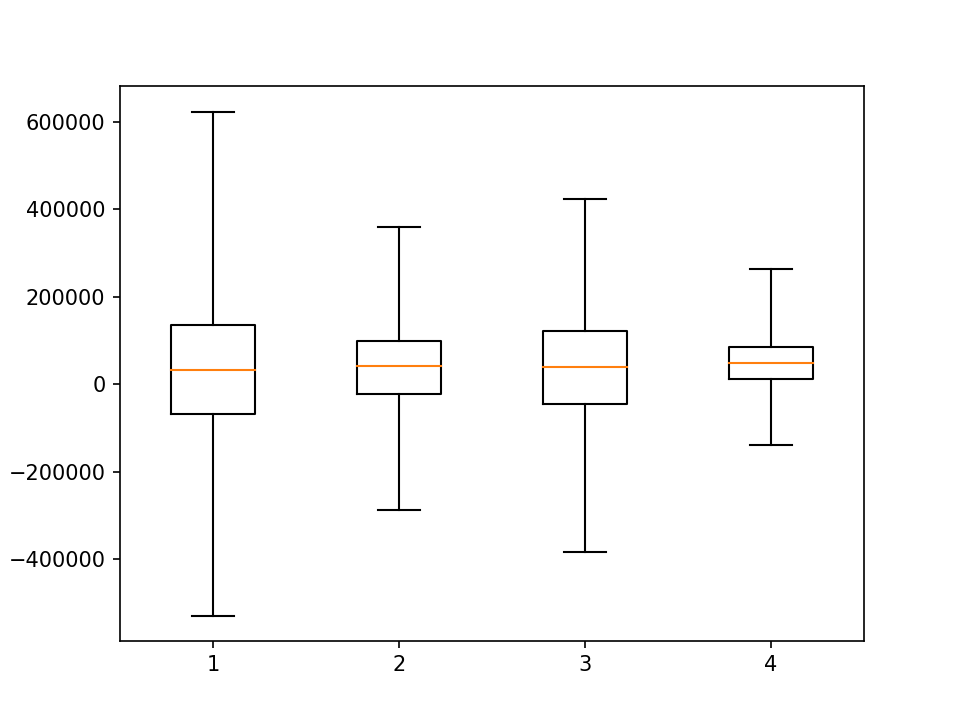

In [5]:
plt.figure()
_ = plt.boxplot([dfT[1992], dfT[1993],dfT[1994],dfT[1995]], whis='range')

<IPython.core.display.Javascript object>


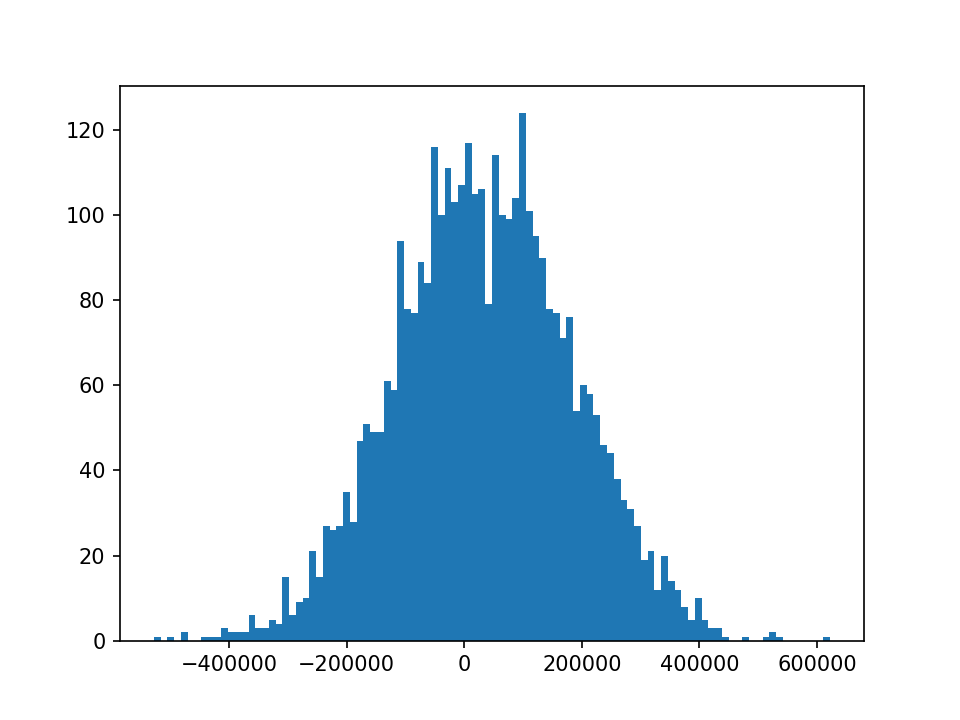

In [6]:
plt.figure()
_ = plt.hist(dfT[1992], bins=100)

In [7]:
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

[1992, 1993, 1994, 1995]
[34484.080606658281, 39975.673586966062, 37565.689949770465, 47798.504332995559]


<IPython.core.display.Javascript object>


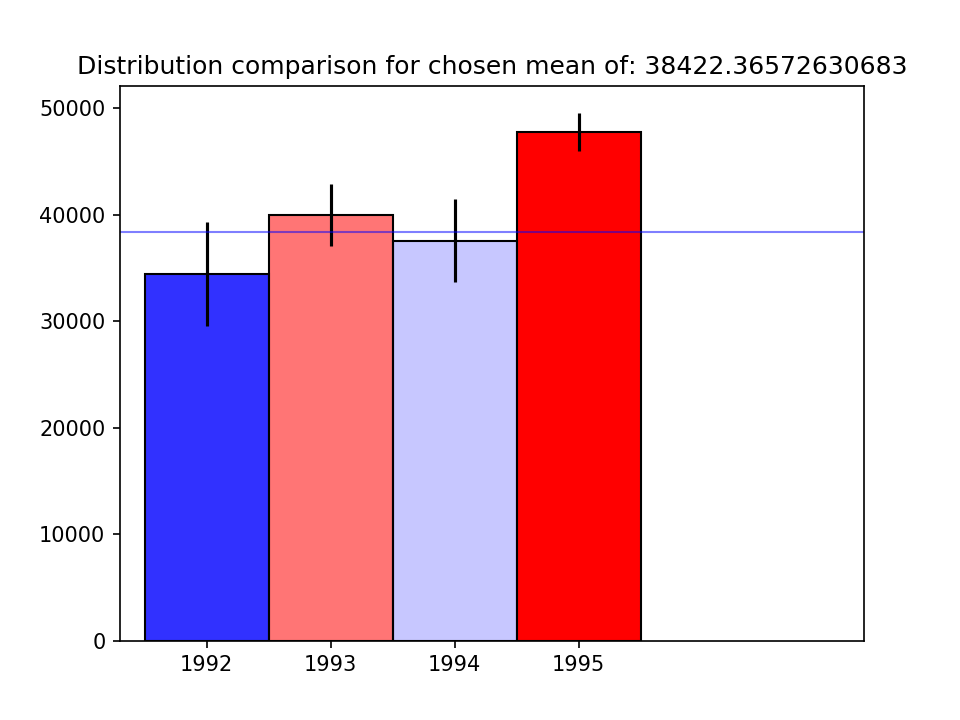

7

In [14]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

meanSeries = dfStats.loc['mean']
xMeanList = list(dfStats)
yMeanList = list(meanSeries)
errList = list(dfStats.loc['yerr'])

print(xMeanList)
print(yMeanList)

pos = np.arange(len(xMeanList))/2
fig= plt.figure()

container = plt.bar(pos, yMeanList, align='center', yerr= errList, edgecolor='black', color=['blue', 'white', 'white', 'red'], width = .5, linewidth =1)
_=plt.xticks(pos, xMeanList)
x1, x2 = plt.xlim()
plt.xlim(x1, x2 + .8)
bars = container.get_children()
for b in bars:
    b.set_color((0.1, 0.2, 0.5, 0.3)) #rgba

#fig.canvas.draw()
#rec_gc(plt.gca())

y=30000
x1, x2 = plt.xlim()
line, = plt.plot([x1, x2], [y, y], 'k-', color=(0,0,1,.5), lw=1, label="_not in legend")

def onclick(event):
    #plt.cla()
    #plt.plot(data)
    plt.gca().set_title('Distribution comparison for chosen mean of: {}'.format( event.ydata))
    line.set_ydata([event.ydata,event.ydata])
    yPick = event.ydata
    #plt.axhline(y=y, zorder=1, color='k')
    #yt = plt.gca().get_yticks()
    #yt = np.append(yt, y)
    #plt.gca().set_yticks(yPick)
    for b, yMean, yErr in zip(bars, yMeanList, errList):
        redVal =0
        blueVal =0
        alpha =1
        if yPick > yMean :
            blueVal = 1 #min(1, (yPick-yMean-yErr)/yErr)
            alpha = min(1, (yPick-yMean)/yErr)
        if yPick < yMean :
            redVal = 1 #min(1, (yMean-yPick-yErr)/yErr) 
            alpha = min(1, (yMean-yPick)/yErr) 
        b.set_color((redVal, 0, blueVal, alpha)) #rgba
        b.set_edgecolor('black')

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


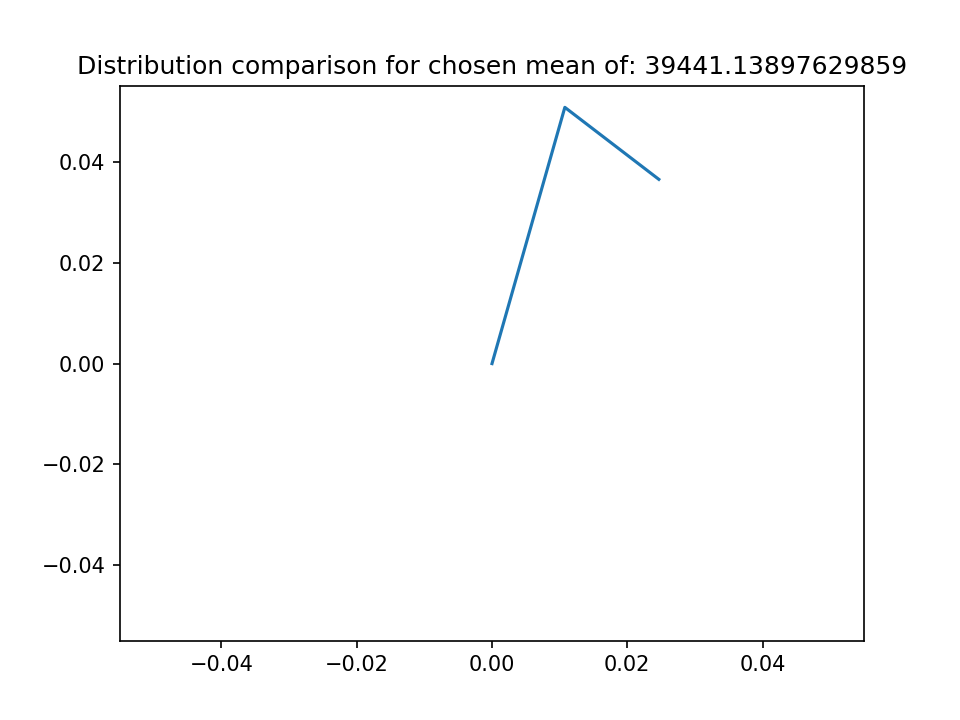

In [9]:
from matplotlib import pyplot as plt

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

plt.show()